In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plot

In [4]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

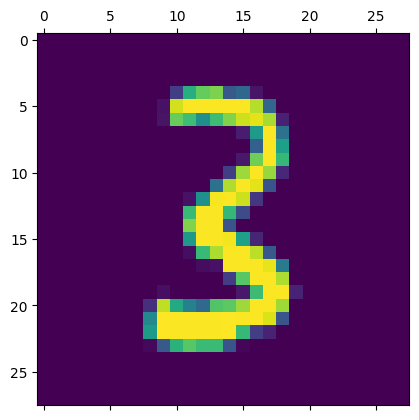

In [9]:
plot.matshow(x_train[50000])

In [11]:
y_train[50000]

3

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
#flattening 2-D array into 1-D
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [15]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [16]:
#defining our simple neural network
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,),activation = 'sigmoid')])
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4662 - accuracy: 0.8782
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3032 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9258


In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9249


[0.26616331934928894, 0.9248999953269958]

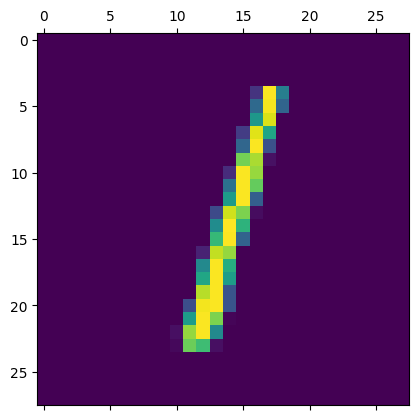

In [19]:
plot.matshow(x_test[2])

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
y_predicted = model.predict(x_test_flattened)
y_predicted[2]

313/313 [==============================] - 1s 2ms/step


array([3.6042058e-04, 9.9227780e-01, 6.1591357e-01, 2.6720753e-01,
       2.5719503e-02, 9.4137616e-02, 1.3298808e-01, 9.3321815e-02,
       2.8946111e-01, 3.9123394e-02], dtype=float32)

In [22]:
np.argmax(y_predicted[2])

1

In [23]:
#checking how many errors our model has
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    4,    9,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,    9,  930,   17,    7,    3,   13,   10,   33,    5],
       [   3,    0,   21,  918,    0,   25,    2,   11,   21,    9],
       [   1,    1,    5,    2,  897,    0,   14,    4,    9,   49],
       [  11,    3,    4,   28,    5,  783,   17,    4,   31,    6],
       [   9,    3,    9,    1,    7,   12,  913,    2,    2,    0],
       [   1,    6,   25,    5,    7,    1,    0,  940,    1,   42],
       [   9,   10,    7,   23,    9,   30,   10,    9,  855,   12],
       [  11,    7,    1,    9,   18,    8,    0,   14,    6,  935]])>

In [28]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ---- ----------------------------------- 30.7/293.3 kB ? eta -:--:--
     ----------- ------------------------- 92.2/293.3 kB 249.8 kB/s eta 0:00:01
     ----------- ------------------------- 92.2/293.3 kB 249.8 kB/s eta 0:00:01
     ------------- ---------------------- 112.6/293.3 kB 252.2 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 257.8 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 257.8 kB/s eta 0:00:01
     --------------- -------------------- 122.9/293.3 kB 257.8 kB/s eta 0:00:01
   


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(95.72222222222221, 0.5, 'truth')

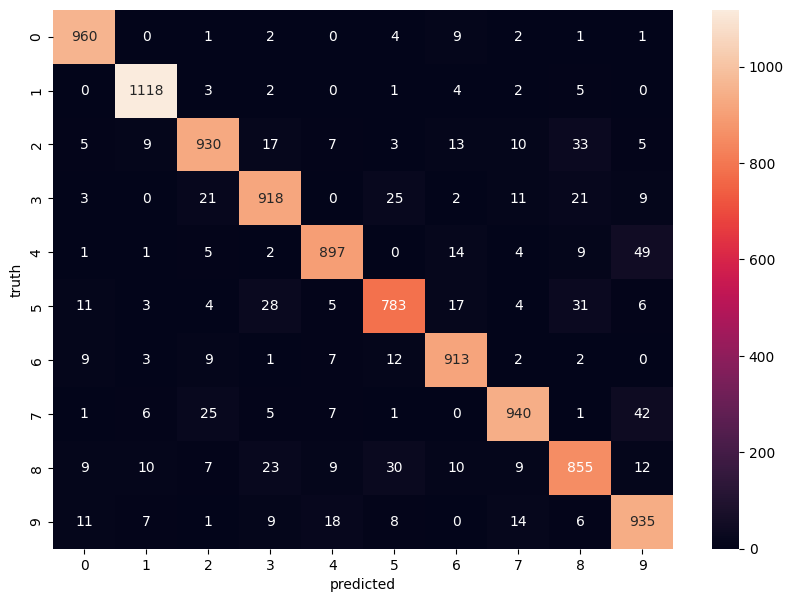

In [30]:
import seaborn as sn
plot.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt ='d')
plot.xlabel('predicted')
plot.ylabel('truth')

In [31]:
#using a hidden layer
model = keras.Sequential([keras.layers.Dense(100, input_shape = (784,),activation = 'relu'),
                         keras.layers.Dense(10,activation = 'sigmoid')])
model.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0847 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0510 - accuracy: 0.9842


In [32]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9736


[0.08654216676950455, 0.9735999703407288]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'truth')

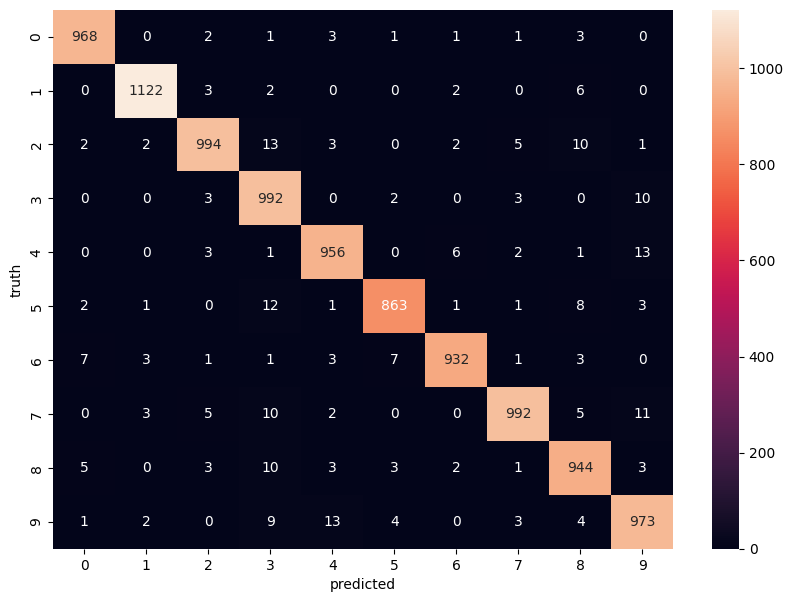

In [33]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

import seaborn as sn
plot.figure(figsize = (10,7))
sn.heatmap(cm,annot = True, fmt ='d')
plot.xlabel('predicted')
plot.ylabel('truth')